In [1]:
# Importing the packages

import numpy as np 
import pandas as pd 
import os
import cv2

import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [2]:
#  Mounting to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
vgg16cnn__model = load_model("/content/gdrive/MyDrive/Drowsiness_detection/models/Drowsiness_detection_vgg16.h5")

In [4]:
vgg16cnn__model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [5]:
#  Testing on Face

Label
 Open
label1 1
nprediction max =\  1
Label
 Open
label2 1
nprediction max =\  1
Proceed
*** [2.2190477e-05 9.9997783e-01] ***** [3.837939e-05 9.999616e-01]


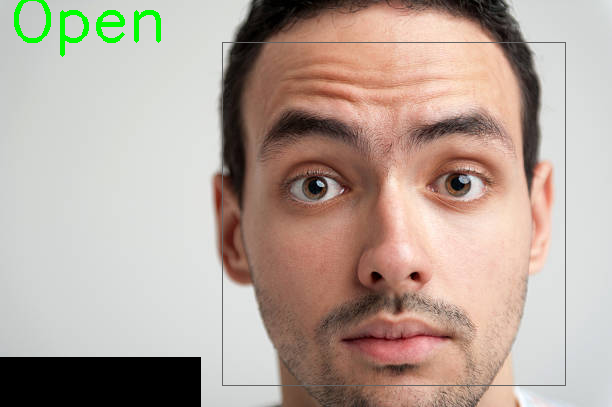

In [9]:
import cv2
import os
from keras.models import load_model
import numpy as np
import time
from google.colab.patches import cv2_imshow


face = cv2.CascadeClassifier('/content/gdrive/MyDrive/Drowsiness_detection/haar cascade files/haarcascade_frontalface_alt.xml')
leye = cv2.CascadeClassifier('/content/gdrive/MyDrive/Drowsiness_detection/haar cascade files/haarcascade_lefteye_2splits.xml')
reye = cv2.CascadeClassifier('/content/gdrive/MyDrive/Drowsiness_detection/haar cascade files/haarcascade_righteye_2splits.xml')



class_labels=['Close','Open']

frame = cv2.imread("/content/gdrive/MyDrive/Drowsiness_detection/image.jpg")

height,width = frame.shape[:2] 

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

faces = face.detectMultiScale(gray,minNeighbors=5,scaleFactor=1.1,minSize=(25,25))
left_eye = leye.detectMultiScale(gray)
right_eye =  reye.detectMultiScale(gray)

cv2.rectangle(frame, (0,height-50) , (200,height) , (0,0,0) , thickness=cv2.FILLED )

for (x,y,w,h) in faces:
    cv2.rectangle(frame, (x,y) , (x+w,y+h) , (100,100,100) , 1 )

for (x,y,w,h) in right_eye:
    r_eye=frame[y:y+h,x:x+w]
    # count=count+1
    # r_eye = cv2.cvtColor(r_eye,cv2.COLOR_BGR2GRAY)
    r_eye = cv2.resize(r_eye,(224,224))
    r_eye= r_eye/255
    r_eye=  r_eye.reshape(224,224,-1)
    r_eye = np.expand_dims(r_eye,axis=0)
    rpred = vgg16cnn__model.predict(r_eye)[0]
label = class_labels[rpred.argmax()]
print("Label\n",label)
label1 = rpred.argmax()
print("label1",label1)
print("nprediction max =\ ",rpred.argmax())

for (x,y,w,h) in left_eye:
    l_eye=frame[y:y+h,x:x+w]
    # count=count+1
    # l_eye = cv2.cvtColor(l_eye,cv2.COLOR_BGR2GRAY)  
    l_eye = cv2.resize(l_eye,(224,224))
    l_eye= l_eye/255
    l_eye=l_eye.reshape(224,224,-1)
    l_eye = np.expand_dims(l_eye,axis=0)
    lpred = vgg16cnn__model.predict(l_eye)[0]
label = class_labels[lpred.argmax()]
print("Label\n",label)
label2 = lpred.argmax()
print("label2",label2)
print("nprediction max =\ ",lpred.argmax())
if label1==label2:
  print("Proceed")
  label_position = (10,40)
  cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
  print("***",lpred,"*****",rpred)
  cv2_imshow(frame)

else:
  label3 = 'alert'
  print("Be_Carefull")
  label_position = (10,40)
  cv2.putText(frame,label3,label_position,cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
  print("***",lpred,"*****",rpred)
  cv2_imshow(frame)

